In [60]:
import io
import os
import torch
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

# from ml_things import plot_dict, plot_confusion_matrix, fix_text
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [61]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LogisticRegression",
    "PassiveAggressiveClassifier"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    PassiveAggressiveClassifier()
]

In [27]:
ep_labels = np.load('euphemism_labels.npy')

In [28]:
ep_data = np.load('euphemism_roberta-base_fea.npy')
ep_fea = []
for i in range(ep_data.shape[0]):
    for j in range(ep_data.shape[1]):
        ep_fea.append(ep_data[i,j,:])
ep_fea = np.array(ep_fea)

In [42]:
ep_data = np.load('euphemism_roberta-base_testfea.npy')
ep_testfea = []
for i in range(ep_data.shape[0]):
    for j in range(ep_data.shape[1]):
        ep_testfea.append(ep_data[i,j,:])
ep_testfea = np.array(ep_testfea)

In [43]:
ep_fea.shape

(1572, 768)

In [45]:
ep_testfea.shape

(393, 768)

In [46]:
ep_roberta = (ep_fea, ep_labels, ep_testfea)

In [30]:
ep_data = np.load('euphemism_bert-base-cased_fea.npy')
ep_fea2 = []
for i in range(ep_data.shape[0]):
    for j in range(ep_data.shape[1]):
        ep_fea2.append(ep_data[i,j,:])
ep_fea2 = np.array(ep_fea2)

In [47]:
ep_data = np.load('euphemism_bert-base-cased_testfea.npy')
ep_testfea2 = []
for i in range(ep_data.shape[0]):
    for j in range(ep_data.shape[1]):
        ep_testfea2.append(ep_data[i,j,:])
ep_testfea2 = np.array(ep_testfea2)

In [48]:
ep_bert = (ep_fea2, ep_labels, ep_testfea2)

/home/host/miniconda3/envs/huggingface/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/host/miniconda3/envs/huggingface/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/host/miniconda3/envs/huggingface/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

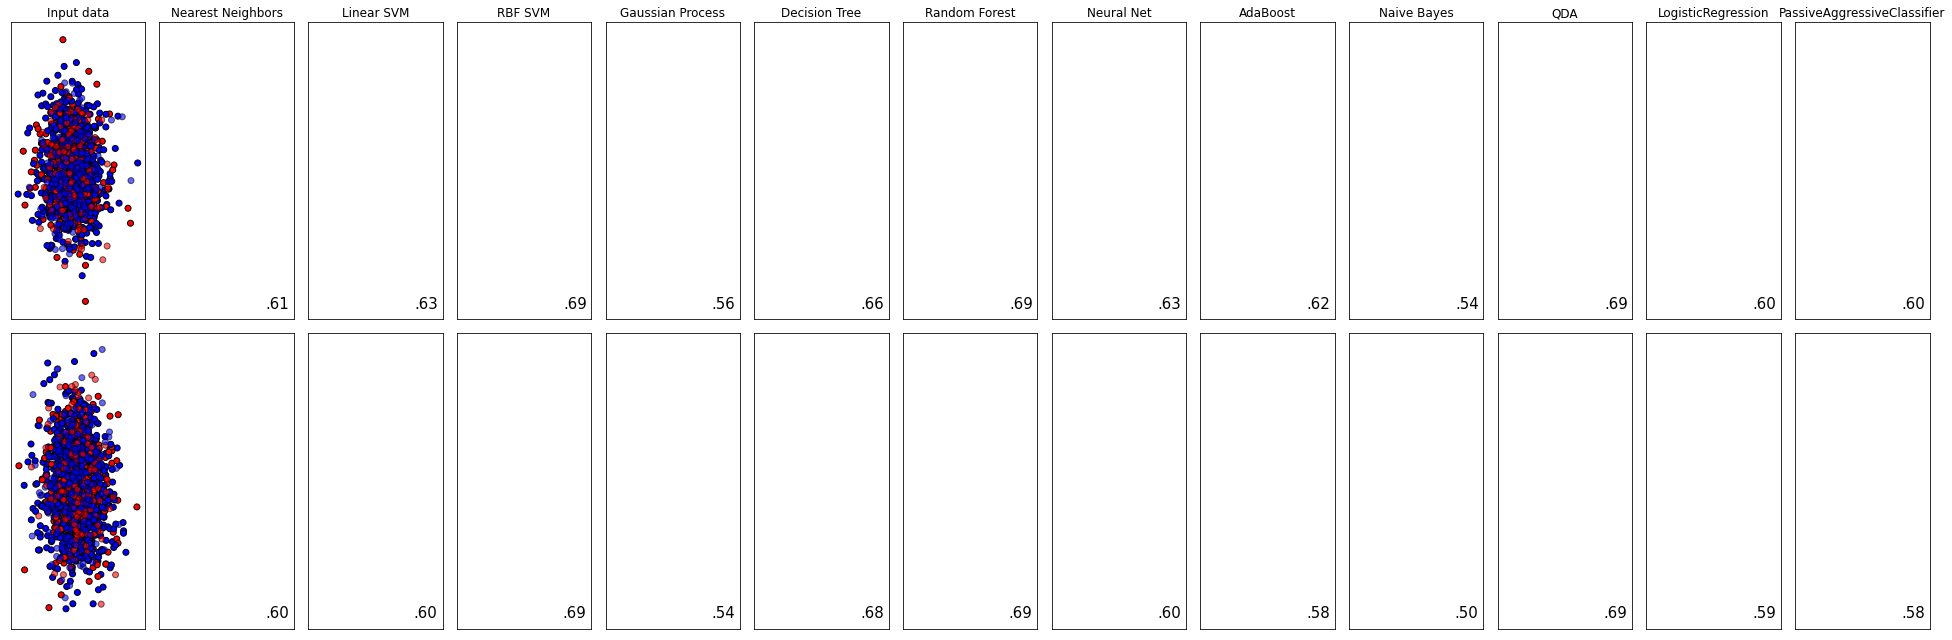

In [71]:
datasets = [
    ep_roberta,
    ep_bert
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y, XX = ds
    # X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )
    xscaler = StandardScaler().fit(X_train)
    X_train = xscaler.transform(X_train)
    X_test = xscaler.transform(X_test)

    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # print(X.shape)
        # DecisionBoundaryDisplay.from_estimator(
        #     clf, X[:,[0,1]], cmap=cm, alpha=0.8, ax=ax, eps=0.5
        # )

        # Plot the training points
        # ax.scatter(
        #     X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        # )
        # Plot the testing points
        # ax.scatter(
        #     X_test[:, 0],
        #     X_test[:, 1],
        #     c=y_test,
        #     cmap=cm_bright,
        #     edgecolors="k",
        #     alpha=0.6,
        # )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [64]:
datasets = [
    ep_roberta,
    ep_bert
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
res_all = {}
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y, XX = ds
    X_all = np.concatenate([X,XX], axis=0)
    scaler = StandardScaler().fit(X)
    X_train = scaler.transform(X)
    X_test = scaler.transform(X_test)
    # X_all = StandardScaler().fit_transform(X_all)
    # X_train, X_test, y_train, y_test = train_test_split(
    #     X, y, test_size=0.25, random_state=42
    # )
    X_train = X_all[0:X.shape[0],:]
    X_test = X_all[X.shape[0]:,:]
    y_train = y

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        res_all['{}_{}'.format(ds_cnt, name)] = pred


/home/host/miniconda3/envs/huggingface/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/host/miniconda3/envs/huggingface/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/host/miniconda3/envs/huggingface/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

<Figure size 1944x648 with 0 Axes>

In [65]:
res_all.keys()

dict_keys(['0_Nearest Neighbors', '0_Linear SVM', '0_RBF SVM', '0_Gaussian Process', '0_Decision Tree', '0_Random Forest', '0_Neural Net', '0_AdaBoost', '0_Naive Bayes', '0_QDA', '0_LogisticRegression', '0_PassiveAggressiveClassifier', '1_Nearest Neighbors', '1_Linear SVM', '1_RBF SVM', '1_Gaussian Process', '1_Decision Tree', '1_Random Forest', '1_Neural Net', '1_AdaBoost', '1_Naive Bayes', '1_QDA', '1_LogisticRegression', '1_PassiveAggressiveClassifier'])

In [66]:
for k in res_all.keys():
    with open('{}.txt'.format(k.replace(' ','_')),'w') as fp:
        predictions_labels = list(res_all[k])
        for i, p in enumerate(predictions_labels):
            fp.write('{},{}\n'.format(i,p))

In [67]:
res_all

{'0_Nearest Neighbors': array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1